In [3]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

## Load the debugging data from `.pickle` files stored in logs

In [4]:
timesteps = 0
for x in range(1,11):
    with open(f'../logs/03-05/info{x}000.pickle', 'rb') as fp:
        data = pickle.load(fp)
        timesteps += len(data['eulers'])
timesteps

414826

In [3]:
def openlogs(subpath):
    with open(f'../logs/{subpath}/info1000.pickle', 'rb') as fp:
        data1 = pickle.load(fp)
    with open(f'../logs/{subpath}/info2000.pickle', 'rb') as fp:
        data2 = pickle.load(fp)
    with open(f'../logs/{subpath}/info3000.pickle', 'rb') as fp:
        data3 = pickle.load(fp)
    with open(f'../logs/{subpath}/info4000.pickle', 'rb') as fp:
        data4 = pickle.load(fp)
    with open(f'../logs/{subpath}/info5000.pickle', 'rb') as fp:
        data5 = pickle.load(fp)
    with open(f'../logs/{subpath}/info6000.pickle', 'rb') as fp:
        data6 = pickle.load(fp)
    return data1,data2,data3,data4,data5,data6

In [4]:
def get_critic_loss(lst):
    for critic, _ in lst:
        yield critic

def get_actor_loss(lst):
    for _, actor in lst:
        yield actor

In [7]:
data_vars = [data200, data400, data600, data800, data1000]
for var in data_vars:
    print(type(var))

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


In [8]:
data200.keys()

dict_keys(['loss', 'eulers', 'actions'])

In [46]:
lloss = []
leulers = []
lactions = []

In [33]:
lloss.extend(data200['loss'])

In [34]:
len(lloss)

24944

In [12]:
lloss[0]

(793355.8, -13.964201)

In [56]:
cl200, al200 = list(get_critic_loss(data200['loss'])), list(get_actor_loss(data200['loss']))

In [73]:
def plot_loss(lst1, lst2):
    fig, ax = plt.subplots(1,2,figsize=(15,5))
    ax[0].plot(lst1, 'g.', label='critic loss')
    ax[0].set_xlabel('timestep')
    ax[0].set_ylabel('loss')
    ax[0].legend()
    
    ax[1].plot(lst2, 'g.', label='actor loss')
    ax[1].set_xlabel('timestep')
    ax[1].set_ylabel('loss')
    ax[1].legend()
    plt.show()

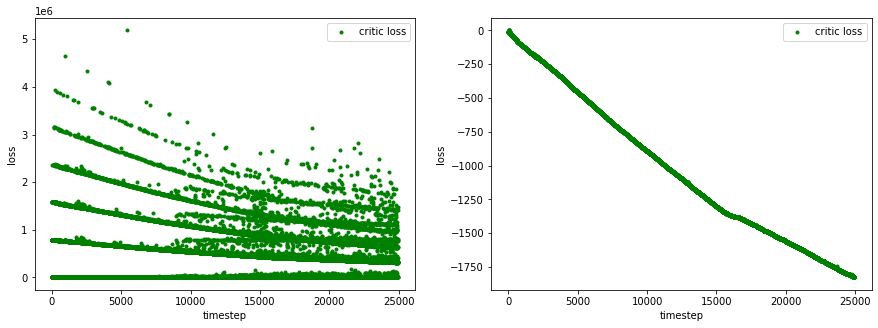

In [63]:
plot_loss(cl200, al200)

In [64]:
cl400, al400 = list(get_critic_loss(data400['loss'])), list(get_actor_loss(data400['loss']))

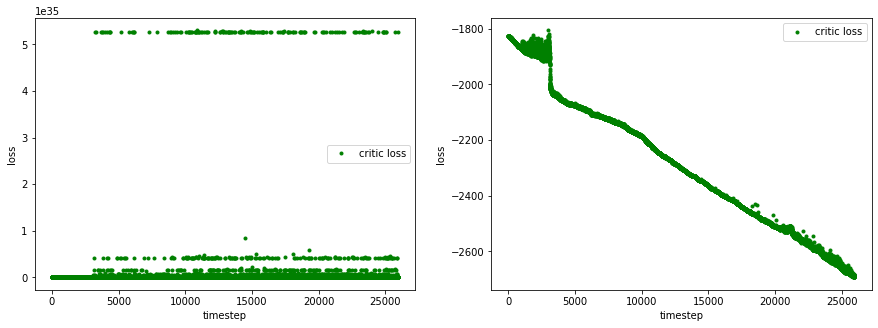

In [65]:
plot_loss(cl400, al400)

In [67]:
cl600, al600 = list(get_critic_loss(data600['loss'])), list(get_actor_loss(data600['loss']))

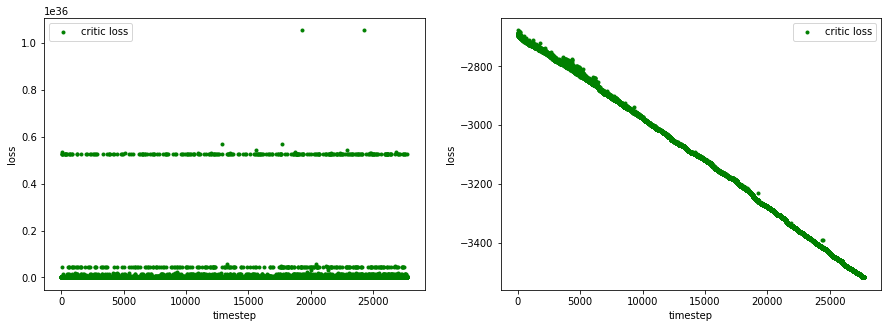

In [68]:
plot_loss(cl600, al600)

In [69]:
cl800, al800 = list(get_critic_loss(data800['loss'])), list(get_actor_loss(data800['loss']))

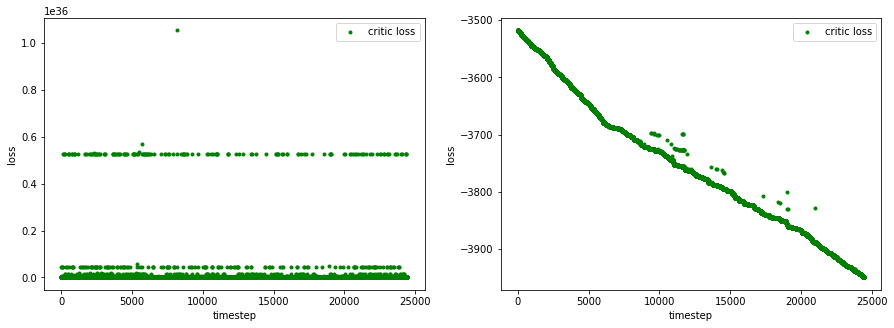

In [70]:
plot_loss(cl800, al800)

In [71]:
cl1000, al1000 = list(get_critic_loss(data1000['loss'])), list(get_actor_loss(data1000['loss']))

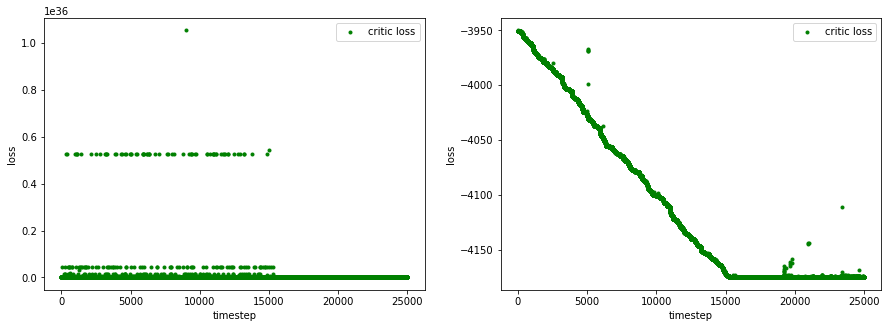

In [72]:
plot_loss(cl1000, al1000)

In [74]:
del cl200, cl400, cl600, cl800, cl1000
del al200, al400, al600, al800, al1000

In [9]:
def plot_losses(lst1, lst2):
    assert len(lst1) == len(lst2)
    fig, ax = plt.subplots(len(lst1),2,figsize=(15,25))
    for x in range(len(lst1)):
        ax[x,0].plot(lst1[x], 'g.', label='critic loss')
        ax[x,0].set_xlabel('timestep')
        ax[x,0].set_ylabel('loss')
        ax[x,0].legend()

        ax[x,1].plot(lst2[x], 'g.', label='actor loss')
        ax[x,1].set_xlabel('timestep')
        ax[x,1].set_ylabel('loss')
        ax[x,1].legend()
    plt.show()

In [6]:
data_dicts = openlogs('03-05')

In [7]:
len(data_dicts)

5

In [14]:
critic_losses = []
actor_losses = []
for x in data_dicts:
    critic_losses.append(list(get_critic_loss(x['loss'])))
    actor_losses.append(list(get_actor_loss(x['loss'])))

In [15]:
len(critic_losses)

5

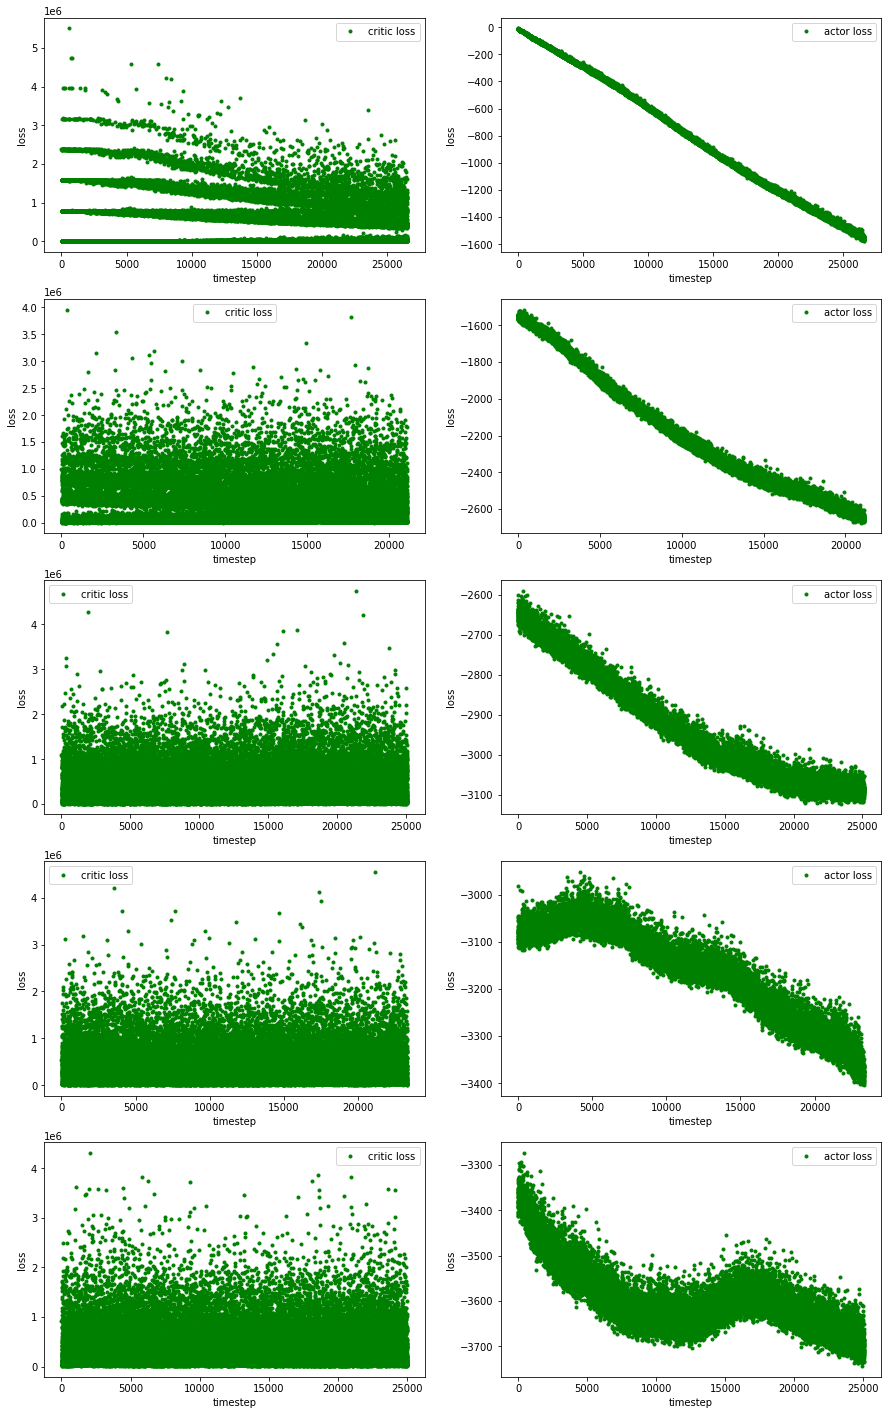

In [16]:
plot_losses(critic_losses, actor_losses)

In [17]:
del critic_losses, actor_losses
del data_dicts

In [5]:
datae = openlogs('03-05')

In [7]:
critic_losses = []
actor_losses = []
for x in datae:
    critic_losses.append(list(get_critic_loss(x['loss'])))
    actor_losses.append(list(get_actor_loss(x['loss'])))
del datae

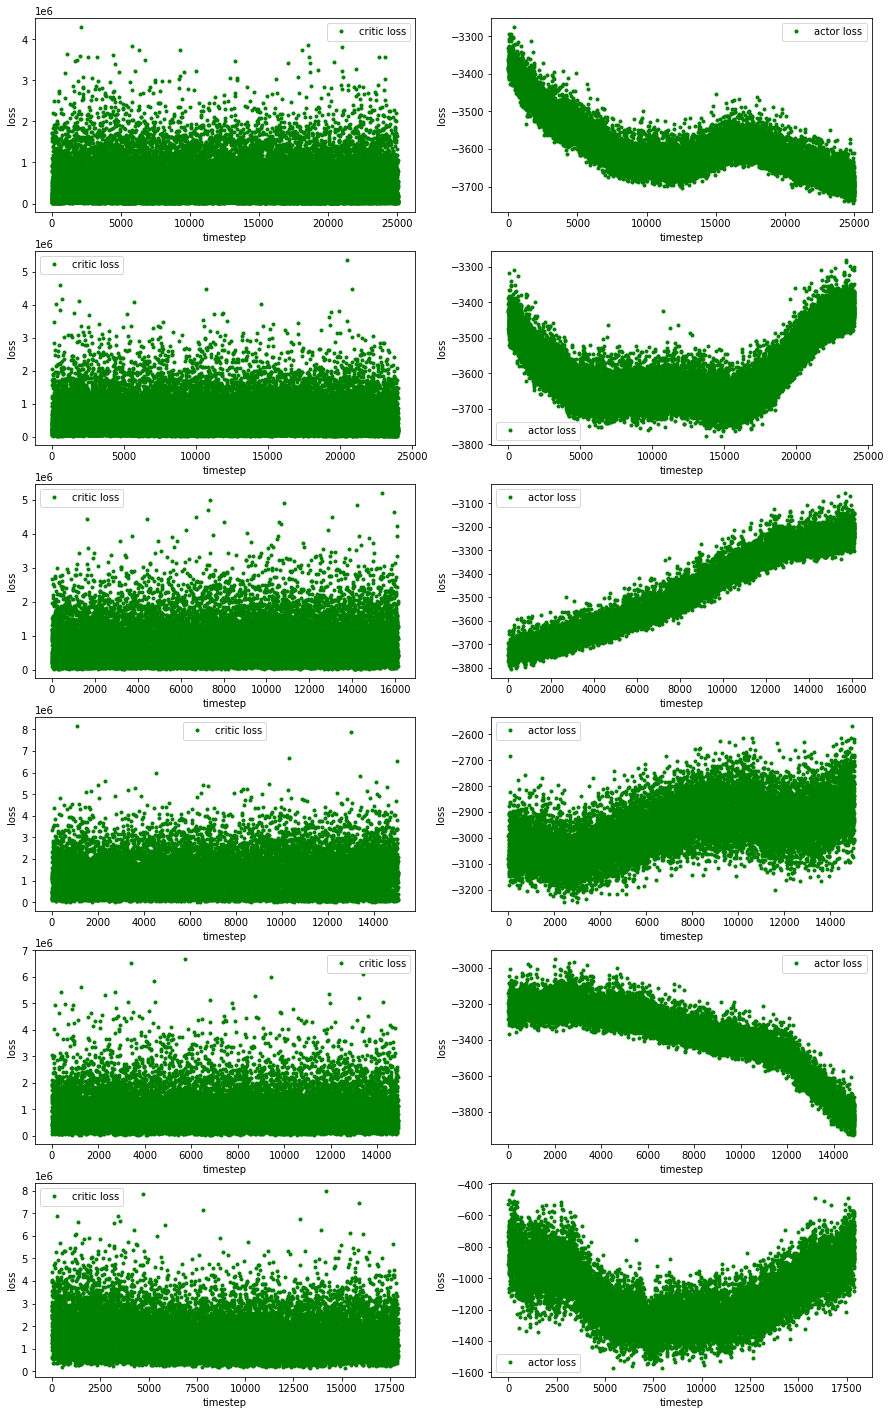

In [10]:
plot_losses(critic_losses, actor_losses)